# Happiness Classification

Happiness dataset consists of responses from a survey about people being happy or unhappy from varying cities.
A feeling of happiness while self introspecting is the major reason we indulge in our hobbies and choose places to live.This Dataset is based on a survey conducted where people rated different metrics of their city on a scale of 5 and answered if they are happy or unhappy.

The goal of this dataset is to understand the important factors that play a role in making the residents of a city more happy with their lives.

**Data Dictionary**:-

> infoavail = the availability of information about the city services

> housecost = the cost of housing

> schoolquality = the overall quality of public schools

> policetrust = your trust in the local police

> streetquality = the maintenance of streets and sidewalks

> events = the availability of social community events

> happy = decision attribute (D) with values 0 (unhappy) and 1 (happy)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier as xgc
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/kaggle/input/happiness-classification-dataset/happydata.csv')
df.head()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


In [3]:
df.columns

Index(['infoavail', 'housecost', 'schoolquality', 'policetrust',
       'streetquality', 'ëvents', 'happy'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   infoavail      143 non-null    int64
 1   housecost      143 non-null    int64
 2   schoolquality  143 non-null    int64
 3   policetrust    143 non-null    int64
 4   streetquality  143 non-null    int64
 5   ëvents         143 non-null    int64
 6   happy          143 non-null    int64
dtypes: int64(7)
memory usage: 7.9 KB


In [5]:
df.describe()

,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,4.314685,2.538462,3.265734,3.699301,3.615385,4.216783,0.538462
std,0.799820,1.118155,0.992586,0.888383,1.131639,0.848693,0.500271
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000,1.000000
75%,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


In [6]:
df.isna().sum()

infoavail        0
housecost        0
schoolquality    0
policetrust      0
streetquality    0
ëvents           0
happy            0
dtype: int64

No missing Data in the table.

In [7]:
features = df.drop(columns='happy')
happy_features = df[df['happy']==1].drop(columns='happy')

# Exploratory Data Analysis

infoavail points distribution 
5    50
4    19
3     8
Name: infoavail, dtype: int64
housecost points distribution 
2    25
3    24
1    14
4     9
5     5
Name: housecost, dtype: int64
schoolquality points distribution 
3    29
4    25
5    11
2     9
1     3
Name: schoolquality, dtype: int64
policetrust points distribution 
4    34
3    24
5    16
1     2
2     1
Name: policetrust, dtype: int64
streetquality points distribution 
4    33
5    22
3    11
2     9
1     2
Name: streetquality, dtype: int64
ëvents points distribution 
5    40
4    29
3     7
1     1
Name: ëvents, dtype: int64


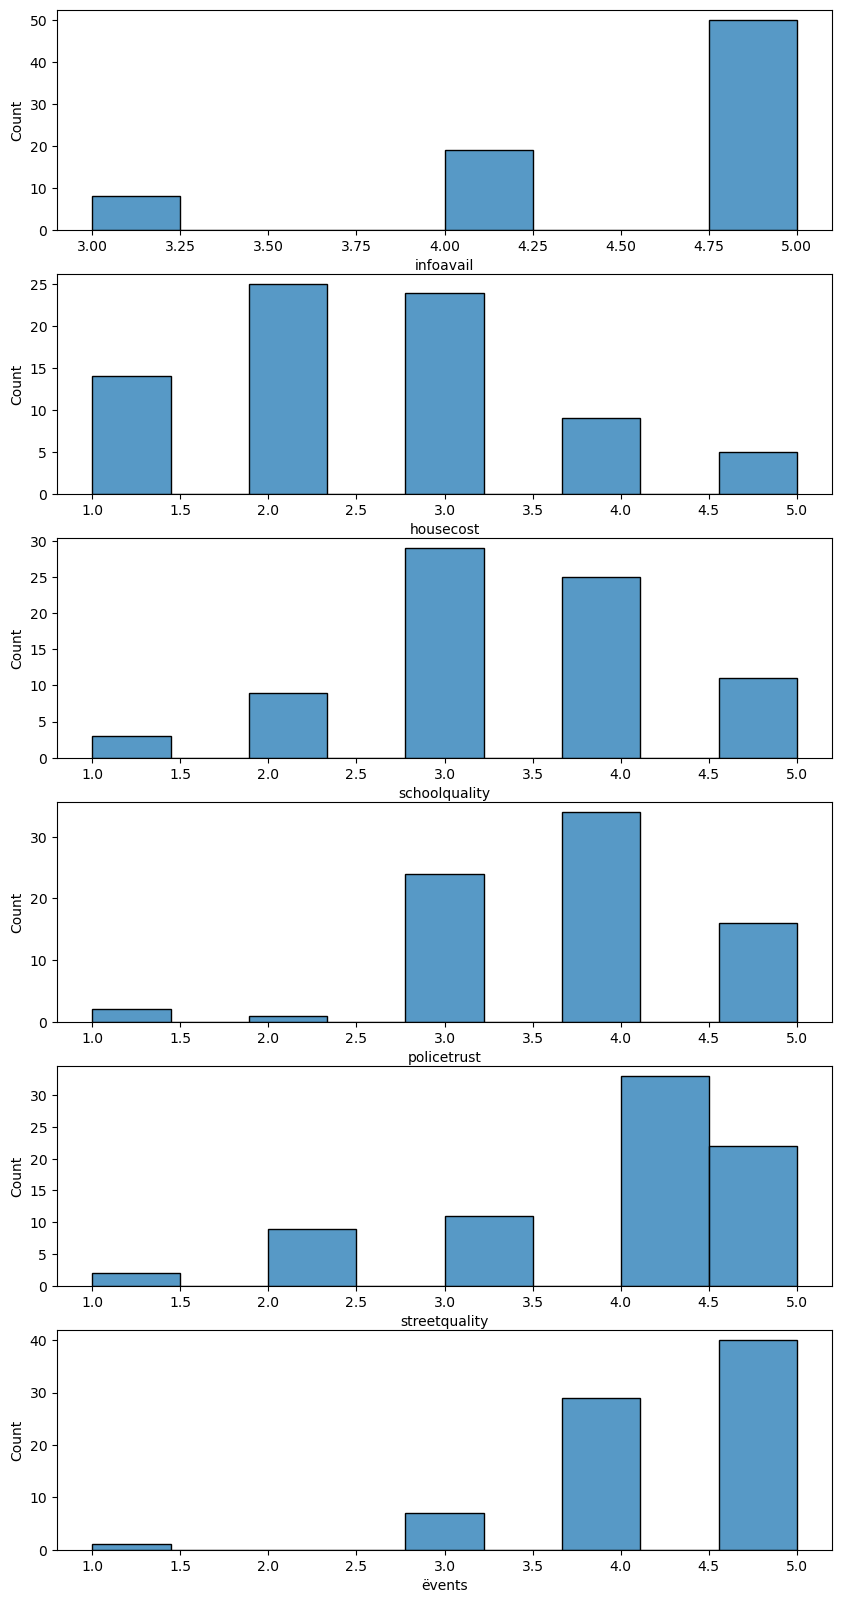

In [8]:
fig, axes = plt.subplots(6, 1,figsize=(10,20))

for i,column in enumerate(happy_features.columns):
    sns.histplot(happy_features[column],kde=False,ax=axes[i])
    print("{0} points distribution \n{1}".format(column,happy_features[column].value_counts()))
plt.show()

**Observation**:
1. 
2. 

<Axes: >

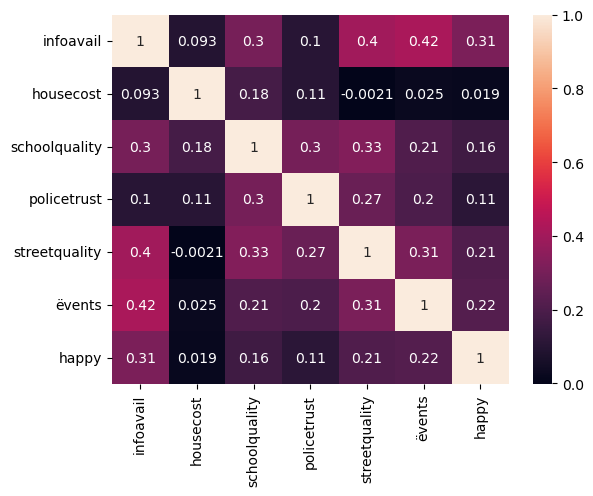

In [9]:
corr = df.corr()
sns.heatmap(corr,annot=True)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(features,df['happy'],test_size=0.15,random_state=22)